In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import random

In [53]:
df = pd.read_csv('final_results.csv')
df

,model,clean,totparams,trainparams,epochtime,nepochs,rmsle
0,BoW,0,6678049,6678049,250,20,0.448557
1,BoW_clean,1,6225953,6225953,250,19,0.450954
2,TfIdf,0,6678049,6678049,250,20,0.457627
3,TfIdf_clean,1,6225953,6225953,250,20,0.454004
4,GloVe6B,0,119191497,75297,117,39,0.472487
5,GloVe6B_clean,1,90674697,75297,118,53,0.470249
6,GloVe840B,0,119191497,75297,135,40,0.460703
7,GloVe840B_clean,1,90674697,75297,121,40,0.463314
8,Bert,0,66543009,180129,1600,5,0.557600
9,NonText,0,769,769,14,40,0.656347


In [118]:
df['trainparams_log'] = df["trainparams"].apply(np.log)
df['trainparams_log2'] = df["trainparams"].apply(lambda x: np.log(x)**2)
df['totparams_log'] = df["totparams"].apply(np.log)
df['totparams_log2'] = df["totparams"].apply(lambda x: np.log(x)**2)
df['etime_log'] = df["epochtime"].apply(np.log)
df['etime_log2'] = df["epochtime"].apply(lambda x: np.log(x)**2)
df['tottime'] = df['epochtime']*df['nepochs']
df["clean_b"] = df["clean"].astype('boolean')
df

,model,clean,totparams,trainparams,epochtime,nepochs,rmsle,trainparams_log,trainparams_log2,totparams_log,...,TotalTime,EpochTime,Rmsle,Model,NumberOfEpochs,TrainParams,TotalParams,Clean,tottime,clean_b
0,Bert,0,66543009,180129,1600,5,0.557600,12.101429,146.444573,18.013359,...,8000,1600,0.557600,Bert,5,180129,66543009,0,8000,False
1,BoW,0,6678049,6678049,250,20,0.448557,15.714336,246.940370,15.714336,...,5000,250,0.448557,BoW,20,6678049,6678049,0,5000,False
2,BoW_clean,1,6225953,6225953,250,19,0.450954,15.644237,244.742154,15.644237,...,4750,250,0.450954,BoW_clean,19,6225953,6225953,1,4750,True
3,GloVe6B,0,119191497,75297,117,39,0.472487,11.229196,126.094833,18.596242,...,4563,117,0.472487,GloVe6B,39,75297,119191497,0,4563,False
4,GloVe6B_clean,1,90674697,75297,118,53,0.470249,11.229196,126.094833,18.322789,...,6254,118,0.470249,GloVe6B_clean,53,75297,90674697,1,6254,True
5,GloVe840B,0,119191497,75297,135,40,0.460703,11.229196,126.094833,18.596242,...,5400,135,0.460703,GloVe840B,40,75297,119191497,0,5400,False
6,GloVe840B_clean,1,90674697,75297,121,40,0.463314,11.229196,126.094833,18.322789,...,4840,121,0.463314,GloVe840B_clean,40,75297,90674697,1,4840,True
7,Keras,0,19871997,19871997,790,7,0.446618,16.804822,282.402046,16.804822,...,5530,790,0.446618,Keras,7,19871997,19871997,0,5530,False
8,Keras_clean,1,15119197,15119197,549,9,0.452475,16.531476,273.289693,16.531476,...,4941,549,0.452475,Keras_clean,9,15119197,15119197,1,4941,True
9,NonText,0,769,769,14,40,0.656347,6.645091,44.157234,6.645091,...,560,14,0.656347,NonText,40,769,769,0,560,False


In [100]:
df = df.sort_values("model")
df.reset_index(inplace=True, drop=True)
df.head(2)

,model,clean,totparams,trainparams,epochtime,nepochs,rmsle,trainparams_log,trainparams_log2,totparams_log,...,etime_log2,TotalTime,EpochTime,Rmsle,Model,NumberOfEpochs,TrainParams,TotalParams,Clean,tottime
0,Bert,0,66543009,180129,1600,5,0.557600,12.101429,146.444573,18.013359,...,54.431327,8000,1600,0.557600,Bert,5,180129,66543009,0,8000
1,BoW,0,6678049,6678049,250,20,0.448557,15.714336,246.940370,15.714336,...,30.486531,5000,250,0.448557,BoW,20,6678049,6678049,0,5000


In [95]:
fig = px.scatter(df, x="epochtime", y="rmsle", size='totparams_log2',
                 text=None, color="model", width=900, height=600,
                 log_x=False, log_y=False, size_max=40,
                 labels={
                     "epochtime": "Durata di un'epoca (s)",
                     "rmsle": "Rmsle",
                     "model": "Modello"
                 },
                 #title="Rmsle in funzione della Durata di un epoca di training. La dimensione corrisponde ai Parametri Totali"
                )
#fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
#fig.update_traces(textposition='top center')
#fig.update_layout(showlegend=False)

# errore in funzione del tempo richiesto da una singola epoca.
# la dimensione corrisponde ai parametri totali dei modelli

fig.show()

In [96]:
#df['trainparams_log2'] = df["trainparams"].apply(lambda x: np.log(x)**2)
fig = px.scatter(df, x="epochtime", y="rmsle", size='trainparams_log2',
                 text=None, color="model", width=900, height=600,
                 log_x=False, log_y=False, size_max=50,
                 labels={
                     "epochtime": "Durata di un'epoca (s)",
                     "rmsle": "Rmsle",
                     "model": "Modello"
                 },
                #title="Rmsle in funzione della Durata di un epoca di training. La dimensione corrisponde ai Parametri Allenabili"
                )
#fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
#fig.update_traces(textposition='top center')
#fig.update_layout(showlegend=False)

# errore in funzione del tempo richiesto da una singola epoche.
# la dimensione corrisponde ai parametri trainabili dei modelli

fig.show()

In [97]:
fig = px.scatter(df, x="nepochs", y="rmsle", size='etime_log2',
                 text=None, color="model", width=900, height=600,
                 log_x=False, log_y=False, size_max=50,
                 labels={
                     "nepochs": "Numero di epoche",
                     "rmsle": "Rmsle",
                     "model": "Modello"
                 },
                 #title="Rmsle in funzione del numero totale di epoche di training. La dimensione corrisponde alla durata di una singola epoca"
                )
#fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
#fig.update_traces(textposition='top center')
#fig.update_layout(showlegend=False)

# Errore in funzione del Numero di Epoche
# La dimensione dipende dal tempo richiesto da una singola epoca
fig.show()

In [106]:
fig = px.scatter(df, x="tottime", y="rmsle", size='etime_log2',
                 text=None, color="model", width=900, height=600,
                 log_x=False, log_y=False, size_max=40,
                 labels={
                     "tottime": "Tempo totale di training (s)",
                     "rmsle": "Rmsle",
                     "model": "Modello"
                 },
                 #title="Rmsle in funzione del Tempo totale di training. La dimensione corrisponde alla durata di una singola epoca"
                )
#fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
#fig.update_traces(textposition='top center')
#fig.update_layout(showlegend=False)

# errore in funzione del tempo totale di train = nepochs*epochstime
# dimensione è il tempo della singola epoca

fig.show()

In [109]:
### df['totparams_log2'] = df["totparams"].apply(lambda x: np.log(x)**2)
fig = px.scatter(df, x="trainparams", y="rmsle", size='totparams_log2',
                 text=None, color="model", width=900, height=600,
                 log_x=True, log_y=False, size_max=40,
                 labels={
                     "trainparams": "Numero di Paramatri Allenabili",
                     "rmsle": "Rmsle",
                     "model": "Modello"
                 },
                 #title="Rmsle in funzione del Numeri di Parametri Allenabili. La dimensione corrisponde ai Parametri Totali"
                )
#fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
#fig.update_traces(textposition='top center')
#fig.update_layout(showlegend=False)

# errore in funzione del numero di parametri trainabili (anche dimensione)

fig.show()

In [112]:
fig = px.scatter(df, x="totparams", y="rmsle", size='trainparams_log2',
                 text=None, color="model", width=900, height=600,
                 log_x=True, log_y=False, size_max=40,
                 labels={
                     "totparams": "Numero Totale di Paramatri",
                     "rmsle": "Rmsle",
                     "model": "Modello"
                 },
                 #title="Rmsle in funzione del Numeri Totale Parametri Allenabili. La dimensione corrisponde ai Parametri Allenabili"
                )
#fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
#fig.update_traces(textposition='top center')
#fig.update_layout(showlegend=False)

# errore in funzione del numero di parametri trainabili (anche dimensione)

fig.show()

In [123]:
fig = px.scatter(df, x="epochtime", y="rmsle", size='trainparams_log2',
                 text=None, color="clean_b", width=900, height=600,
                 log_x=False, log_y=False, size_max=40,
                 labels={
                     "epochtime": "Durata di una singola Epoca (s)",
                     "rmsle": "Rmsle",
                     "clean_b": "Pulizia del Testo"
                 },
                 #title="Pulizia del Testo (colore). Rmsle in funzione della Durata di una singola Epoca. La dimensione corrisponde ai Parametri Allenabili"
                )
#fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
#fig.update_traces(textposition='top center')
#fig.update_layout(showlegend=False)

# errore in funzione del numero di parametri trainabili (anche dimensione)

fig.show()

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*2000, c=x, cmap="Blues", alpha=1, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()


In [106]:
textmat = ((0.4485570192337036, 250, "BoW"),
(0.4509544968605042, 250, "BoW_clean"),
(0.4576269388198853, 35, "TfIdf"),
(0.4540041983127594, 35, "TfIdf_clean"),
(0.4724872410297394, 117, "GloVe6B"),
(0.470249354839325, 118, "GloVe6B_clean"),
(0.4607028365135193, 135, "GloVe840B"),
(0.463313639163971, 121, "GloVe840B_clean"),
(0.5576, 1400, "Bert"),
(0.6563467383384705, 16, "NonText"))
textmat

((0.4485570192337036, 250, 'BoW'),
 (0.4509544968605042, 250, 'BoW_clean'),
 (0.4576269388198853, 35, 'TfIdf'),
 (0.4540041983127594, 35, 'TfIdf_clean'),
 (0.4724872410297394, 117, 'GloVe6B'),
 (0.470249354839325, 118, 'GloVe6B_clean'),
 (0.4607028365135193, 135, 'GloVe840B'),
 (0.463313639163971, 121, 'GloVe840B_clean'),
 (0.5576, 1400, 'Bert'),
 (0.6563467383384705, 16, 'NonText'))

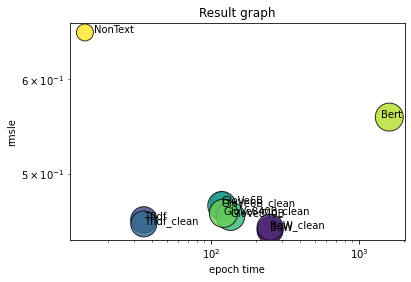

In [107]:
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(df['epochtime'], df['rmsle'], s=df['totparams_log']*100, c=df.index, alpha=0.8,
            edgecolors="black", linewidth=1)
 
# Add titles (main and on axis)
plt.xlabel("epoch time")
plt.ylabel("rmsle")
plt.title("Result graph")

plt.yscale('log')
plt.xscale('log')

#for i in range(df.shape[1]-1):
#    line = df.iloc[i]
#    plt.text(line["epochtime"], line["rmsle"], line["model"])
for i in textmat:
    plt.text(i[1],i[0],i[2])
    
plt.show()

In [93]:
for i in range(df.shape[1]-1):
    line = df.iloc[i]
    print(line["rmsle"], line["epochtime"], line["model"])

0.4485570192337036 250 BoW
0.4509544968605042 250 BoW_clean
0.4576269388198853 35 TfIdf
0.4540041983127594 35 TfIdf_clean
0.4724872410297394 117 GloVe6B
0.470249354839325 118 GloVe6B_clean
0.4607028365135193 135 GloVe840B
0.463313639163971 121 GloVe840B_clean
0.5576 1600 Bert
0.6563467383384705 14 NonText
